In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [15]:
# Load the dataset
telecom_data = pd.read_csv('customer_churn.csv')


In [17]:
telecom_data.head()

,monthly_bill_amount,contract_length_months,service_calls_last_3_months,service_issues_last_3_months,total_services_subscribed,months_as_customer,avg_monthly_usage_gb,churn_status
0,110.54,12,3,1,2,110,461.6,No
1,57.20,6,0,1,4,29,416.9,No
2,49.49,24,0,2,3,37,27.2,Yes
3,91.67,12,3,0,4,48,191.1,No
4,113.53,6,1,1,3,117,203.9,No


In [19]:
# Split features and target
X = telecom_data.drop('churn_status', axis=1)
y = telecom_data['churn_status']


In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [27]:
# Testing different k values
k_range = range(1, 31)
k_scores = []


In [29]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())


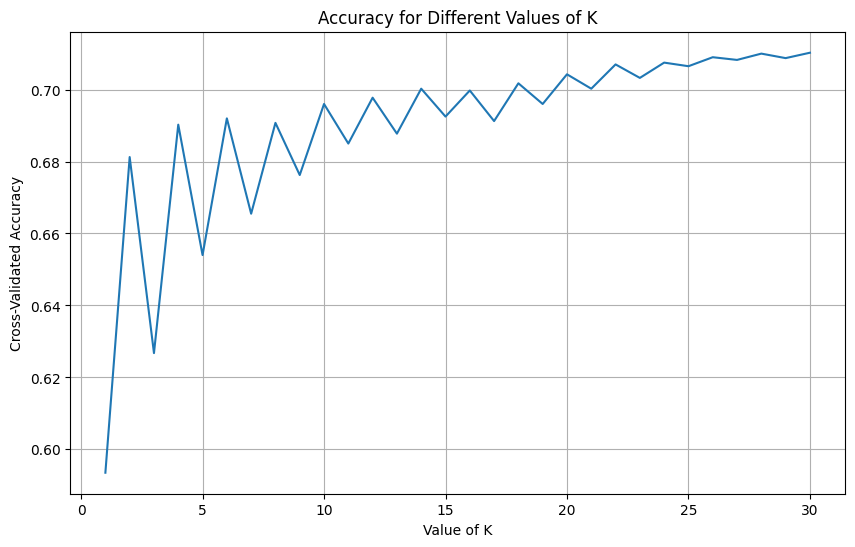

In [31]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy for Different Values of K')
plt.grid(True)
plt.show()


In [33]:
# Find the optimal k
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"The optimal value of k is: {optimal_k}")


The optimal value of k is: 30


In [35]:
# Creating the model with the optimal k
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)


In [37]:
# Training the model
knn_model.fit(X_train_scaled, y_train)


,n_neighbors,30
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
# Making predictions
y_pred = knn_model.predict(X_test_scaled)


In [41]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [43]:
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy: 0.7030

Confusion Matrix:
[[702   1]
 [296   1]]

Classification Report:
              precision    recall  f1-score   support

          No       0.70      1.00      0.83       703
         Yes       0.50      0.00      0.01       297

    accuracy                           0.70      1000
   macro avg       0.60      0.50      0.42      1000
weighted avg       0.64      0.70      0.58      1000



In [45]:
# Creating a weighted k-NN model
weighted_knn = KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights='distance'  # Use distance-weighted voting
)


In [47]:
# Training the model
weighted_knn.fit(X_train_scaled, y_train)


,n_neighbors,30
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
# Making predictions
y_pred_weighted = weighted_knn.predict(X_test_scaled)


In [51]:
# Evaluating the weighted model
w_accuracy = accuracy_score(y_test, y_pred_weighted)
w_conf_matrix = confusion_matrix(y_test, y_pred_weighted)
w_class_report = classification_report(y_test, y_pred_weighted)


In [53]:
print(f"Weighted Model Accuracy: {w_accuracy:.4f}")
print("\nWeighted Confusion Matrix:")
print(w_conf_matrix)
print("\nWeighted Classification Report:")
print(w_class_report)


Weighted Model Accuracy: 0.6970

Weighted Confusion Matrix:
[[696   7]
 [296   1]]

Weighted Classification Report:
              precision    recall  f1-score   support

          No       0.70      0.99      0.82       703
         Yes       0.12      0.00      0.01       297

    accuracy                           0.70      1000
   macro avg       0.41      0.50      0.41      1000
weighted avg       0.53      0.70      0.58      1000

